# Tailorit - Data Exploration

### Import required packages

In [1]:
# Display plots inline
%matplotlib inline

# Autoreload all package before excecuting a call
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tailor
from tailor.data import group_by

### Load data

In [3]:
df = tailor.load_data()
df = group_by.weeks_on_sale(df)

### Get an overview over the dataset

In [4]:
pd.options.display.float_format = "{:.2f}".format
df.describe(include=np.number)

,weeks_on_sale,original_price,sells_price,discount,markdown,article_count,stock_total,avq,revenue
count,216580.00,216580.00,216580.00,216580.00,216580.00,216580.00,216580.00,216580.00,216580.00
mean,12.17,52.81,45.17,2.70,4.94,7.49,1979.82,30.09,282.86
std,7.38,22.65,20.89,5.08,9.49,8.58,1891.05,23.56,299.06
min,0.00,9.95,-32.01,-30.00,-10.00,1.00,106.00,0.00,-32.01
25%,6.00,39.95,29.48,0.19,0.00,2.20,773.00,9.41,99.92
50%,12.00,49.95,42.29,0.84,0.00,4.40,1504.00,25.91,182.05
75%,18.00,69.95,59.03,3.04,10.00,9.50,2749.00,46.54,350.95
max,25.00,179.95,179.95,88.95,90.00,156.14,36396.00,100.12,5511.12


In [5]:
df.describe(include=['category'])

,article_id,season,brand,color,Abteilung,WHG,WUG
count,216580,216580,216580,216580,216580,216580,216580
unique,8708,2,75,40,7,43,152
top,908708,Sommer,Fimmilena,schwarz,Abteilung002,WHG015,WUG053
freq,26,116633,14764,45986,95349,23772,9678


### Check for null values

In [6]:
df.isna().values.any()

False

Wow, we're in luck, there are no null values in the dataset!

### Plot sample article

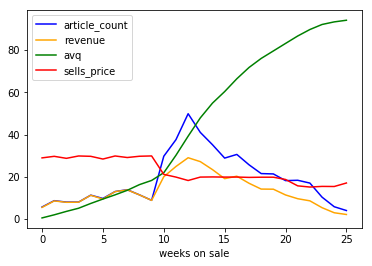

In [7]:
article = df.loc[df.article_id == 900003, [
    "weeks_on_sale", "article_count", "avq", "revenue", "sells_price", "original_price"]]
plt.plot(article.weeks_on_sale, article.article_count, 'blue')
plt.plot(article.weeks_on_sale, article.revenue/article.original_price, 'orange', label='revenue')
plt.plot(article.weeks_on_sale, article.avq, 'green')
plt.plot(article.weeks_on_sale, article.sells_price, 'red')
plt.xlabel('weeks on sale')
plt.legend();

We can see the clear relationship between the amount of articles sold, it's sells price (including markdown and discounts) and the generated revenue and here.